47

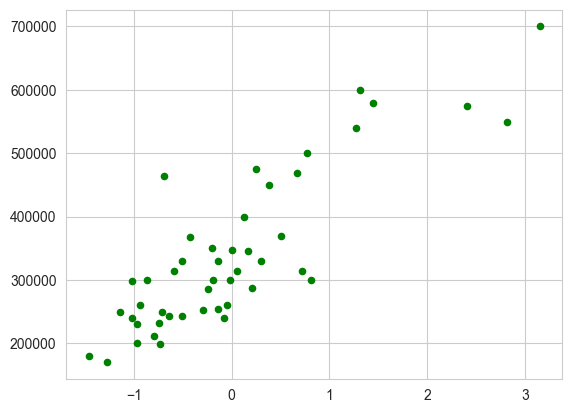

In [7]:
import numpy as np
import matplotlib.pylab as plt

x, y = [], []
for sample in open(r'C:\Users\fzh00\IdeaProjects\python_idea\.idea\测试中\_Data\prices.txt', "r",encoding='utf8'):
    xx, yy = sample.split(",")
    x.append(float(xx))
    y.append(float(yy))
x, y = np.array(x), np.array(y)
# Perform normalization
x = (x - x.mean()) / x.std()
# Scatter dataset
plt.figure()
plt.scatter(x, y, c="g", s=20)
plt.show()

In [ ]:
%prun my_fun(10)

In [ ]:
def my_fun(n):
    n = n+1
    for i in [1,2,4,4,5]:
        n=n+i
    return n

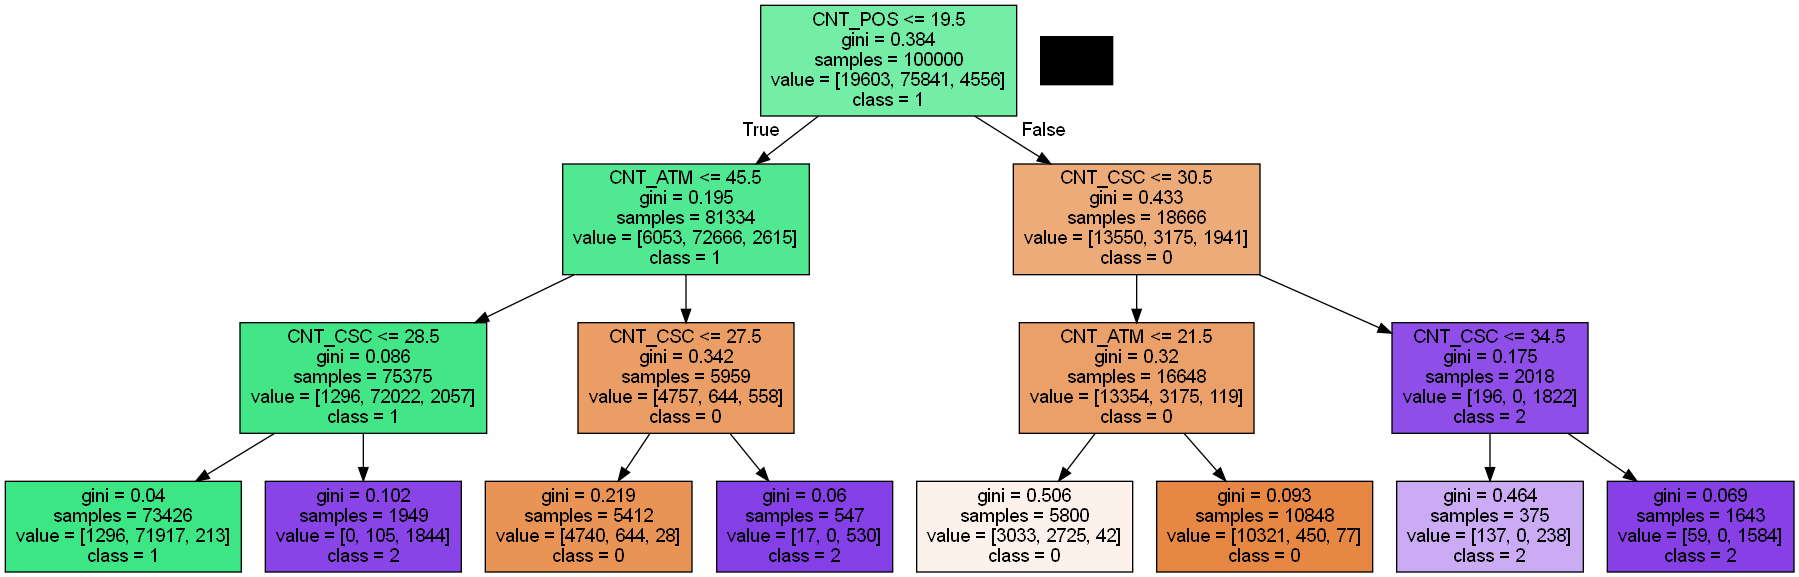

In [8]:
#pydotplus
# pip install pydotplus
#画决策树图。对分类结果进行解读
import pydotplus
from IPython.display import Image
import sklearn.tree as tree
dot_data=tree.export_graphviz(clf,
                              out_file=None,
                              feature_names=df.columns,
                              class_names=["0","1","2"],
                              filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [7]:
#pip install GraphhViz 决策树
from sklearn import tree
#分类树
clf=tree.DecisionTreeClassifier(criterion="gini",
                                max_depth=3,
                                min_samples_split=100,
                                min_samples_leaf=100,
                                random_state=12345)
clf.fit(df,result.labels_)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=100, min_samples_split=100,
                       random_state=12345)

In [19]:
cluster_kmeans_2 = df.join(pd.DataFrame(result.labels_))
cluster_kmeans_2= cluster_kmeans_2.rename(columns={0:'cluster_2'})
cluster_kmeans_2.head()

,ID,CNT_TBM,CNT_ATM,CNT_POS,CNT_CSC,CNT_TOT,cluster_2
0,41360,34,3,3,9,49,1
1,52094,44,17,5,18,84,1
2,57340,122,26,32,36,216,1
3,76885,42,3,6,1,52,0
4,89150,20,15,2,2,39,0


<AxesSubplot: >

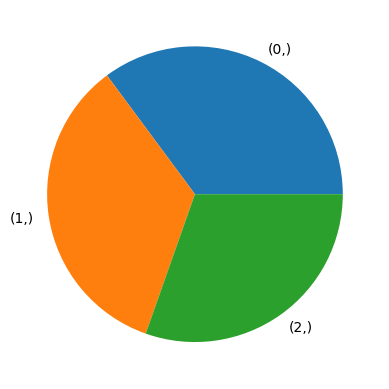

In [17]:
pd.DataFrame(result.labels_).value_counts()
pd.DataFrame(result.labels_).value_counts().plot(kind='pie')

In [16]:
kmeans = KMeans(n_clusters=3)
result = kmeans.fit(qt_data)
result.labels_

array([1, 1, 1, ..., 1, 0, 2])

In [15]:
#kmeans 第二种方法
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal',
                         random_state=0) #正太分布
qt_data = qt.fit_transform(score)
qt_data

array([[-0.50007406, -0.27239277,  0.736054  ],
       [ 0.0954538 , -0.15718856,  1.28441105],
       [ 0.93354137,  1.13244444,  1.80492656],
       ...,
       [ 2.45019361, -0.74707792,  0.98579831],
       [-0.46261041, -1.55426961, -0.75800423],
       [ 0.51787259,  1.16623543, -0.79551975]])

In [6]:
out_kmeans[out_kmeans['cluster']==2]

,ID,CNT_TBM,CNT_ATM,CNT_POS,CNT_CSC,CNT_TOT,cluster
2,57340,122,26,32,36,216,2
42,427493,27,31,39,52,149,2
88,1064704,1024,3,2,33,1062,2
92,1081759,53,21,23,55,152,2
102,1151911,81,88,86,46,301,2
...,...,...,...,...,...,...,...
99919,875025117,114,38,169,69,390,2
99940,875212040,155,13,6,64,238,2
99958,875407306,118,83,20,50,271,2
99973,875481914,49,28,91,87,255,2


In [5]:
#拼接
out_kmeans = df.join(pd.DataFrame(result.labels_))
out_kmeans=out_kmeans.rename(columns={0:'cluster'})
out_kmeans.head()

,ID,CNT_TBM,CNT_ATM,CNT_POS,CNT_CSC,CNT_TOT,cluster
0,41360,34,3,3,9,49,1
1,52094,44,17,5,18,84,1
2,57340,122,26,32,36,216,2
3,76885,42,3,6,1,52,1
4,89150,20,15,2,2,39,1


1    75841
0    19603
2     4556
dtype: int64

<AxesSubplot: >

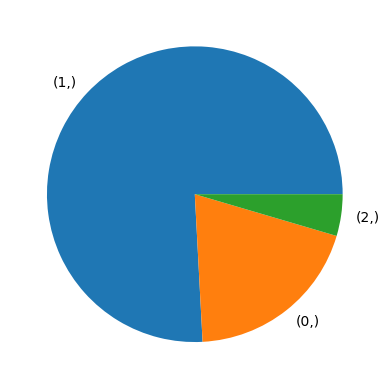

In [4]:
pd.DataFrame(result.labels_).value_counts()
pd.DataFrame(result.labels_).value_counts().plot(kind='pie')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir(r'C:\Data\Jupyter_file\机器学习')

df= pd.read_csv('profile_bank.csv')
data = df.iloc[:,1:-1]
#数据标准化
from sklearn import preprocessing
std_data= preprocessing.scale(data)
#主成分分析 PCA 确定需要几个主成分
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(std_data)
#查看方差特征
pca.explained_variance_
#查看方差比率
pca.explained_variance_ratio_
sum(pca.explained_variance_ratio_)
#因子分析
from fa_kit import FactorAnalysis
from fa_kit import plotting as fa_plotting
#实例化
fa=FactorAnalysis.load_data_samples(
    std_data,
    preproc_demean=True,
    preproc_scale=True
)
fa.extract_components()
#设定提取主成分的方法
fa.find_comps_to_retain(method='top_n',num_keep=3)
#最大方差拉升旋转,看数据 的变异方向
fa.rotate_components(method='varimax')
#因子的载荷矩阵（权重距阵）
# print(fa.comps['rot'])  #表示两个主要因子的权重系数
#输出 因子得分
score = fa.get_component_scores(std_data)
score = pd.DataFrame(score,columns=['POS','TBM','CSC'])
#Kmeans-异常识别
var = ['POS','TBM','CSC']
#求偏度
skew_var={}
for i in var:
    skew_var[i]=score[i].skew()
# skew_var #》右偏； 《0 左偏
#进行Kmeans聚类
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
result = kmeans.fit(score)
print(result.labels_)

PCA(n_components=3)

array([1.60786876, 1.00252275, 0.7339482 ])

array([0.40196317, 0.25062818, 0.18348521])

0.8360765673951299

array([0, 1, 2], dtype=int64)

[1 1 2 ... 0 1 1]


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"